<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Christmas Tree Animation</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

import tqdm as tq
from tqdm import tqdm

import watermark

%load_ext watermark
%matplotlib inline

Generate the initial 3D figure

(-150.0, 5.0)

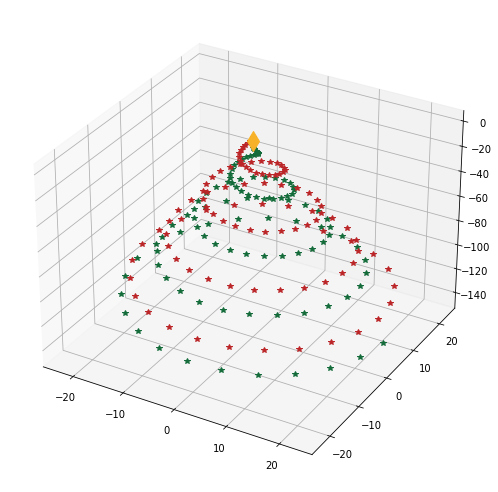

In [2]:
fig = plt.figure(figsize=(8.8, 8.8))
ax = fig.gca(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

r = 4*np.pi+theta
z = -5*r
x = r * np.cos(theta)
y = r * np.sin(theta)

ax.plot(x, y, z, '*', color='#146B3A')

r2 = 4*np.pi+theta+np.pi/2
z2 = -5*r2+5*np.pi
x2 = r * np.cos(theta+np.pi/2)
y2 = r * np.sin(theta+np.pi/2)

ax.plot(x2, y2, z2, '*', color='#BB2528')

ax.scatter3D(0, 0, 5, color='#F8B229', s=200, marker="d")

ax.set_xlim(( -25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

Write the animate function that will produce the individual frames/

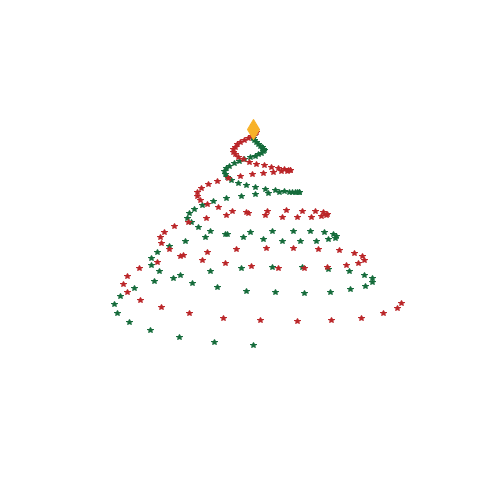

In [3]:
fig = plt.figure(figsize=(8.8, 8.8))
ax = fig.gca(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

ax.set_xlim(( -25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

line1, = ax.plot([], [], [], '*', color='#146B3A')
line2, = ax.plot([], [], [], '*', color='#BB2528')

ax.set_axis_off()
ax.view_init(10, 0)

def animate(i):
    speed = 50
    theta_t = theta-i/speed*np.pi
    
    r = 4*np.pi+theta
    z = -5*r
    x = r * np.cos(theta_t)
    y = r * np.sin(theta_t)

    r2 = 4*np.pi+theta+np.pi/2
    z2 = -5*r2+5*np.pi
    x2 = r * np.cos(theta_t+np.pi/2)
    y2 = r * np.sin(theta_t+np.pi/2)

    line1.set_data_3d(x, y, z)
    line2.set_data_3d(x2, y2, z2)
    ax.scatter3D(0, 0, 5, color='#F8B229', s=200, marker="d")

    return (line1, line2)

animate(0);

Finally, combine it all into the full animation

 88%|████████▊ | 4371/4950 [00:04<00:00, 7027.94it/s]

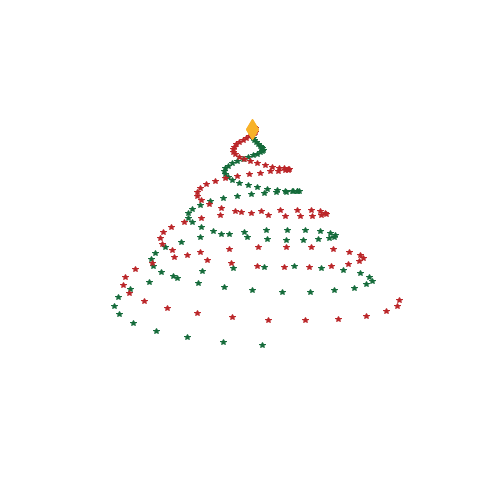

In [4]:
fig = plt.figure(figsize=(8.8, 8.8))
ax = fig.gca(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

ax.set_xlim(( -25, 25))
ax.set_ylim((-25, 25))
ax.set_zlim((-150, 5))

line1, = ax.plot([], [], [], '*', color='#146B3A')
line2, = ax.plot([], [], [], '*', color='#BB2528')

ax.set_axis_off()
ax.view_init(10, 0)

def init():
    line1.set_data_3d([], [], [])
    line2.set_data_3d([], [], [])

    ax.scatter3D(0, 0, 5, color='#F8B229', s=200, marker="d")
    
    return (line1, line2)

bar = tqdm(total=4950)

def animate(i):
    bar.update(i)
    speed = 50
    
    theta_t = theta-i/speed*np.pi
    
    r = 4*np.pi+theta
    z = -5*r
    x = r * np.cos(theta_t)
    y = r * np.sin(theta_t)

    r2 = 4*np.pi+theta+np.pi/2
    z2 = -5*r2+5*np.pi
    x2 = r * np.cos(theta_t+np.pi/2)
    y2 = r * np.sin(theta_t+np.pi/2)

    line1.set_data_3d(x, y, z)
    line2.set_data_3d(x2, y2, z2)

    return (line1, line2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())
#anim.save('christmas.gif')

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>